<a href="https://colab.research.google.com/github/olutobideyoung/MY-R-CODES/blob/main/Assessment_1C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [3]:
# Loading the dataset
df = pd.read_csv("covid19tests.csv", encoding='latin1', thousands=',')

# Convert 'tests' column to numeric, removing commas and handling errors
df['tests'] = pd.to_numeric(df['tests'].str.replace(',', ''), errors='coerce')

# Display first few rows
print(df.head())

# Checking for missing values
print(df.isnull().sum())



  region     country alpha3code alpha2code     tests  positive    date  \
0    NaN   Argentina        ARG         AR    4843.0     966.0  31-Mar   
1    NaN     Armenia        ARM         AM    3603.0     663.0  02-Apr   
2    NaN   Australia        AUS         AU  277355.0    5358.0  03-Apr   
3    NaN     Austria        AUT         AT   98343.0   11350.0  03-Apr   
4    NaN  Azerbaijan        AZE         AZ   30000.0     443.0  03-Apr   

   testper1m  positiveper1m  
0        107          199.0  
1       1221           74.0  
2      10919           19.0  
3      11047          101.0  
4       3031           15.0  
region           80
country           0
alpha3code        1
alpha2code        0
tests             1
positive          2
date              0
testper1m         0
positiveper1m     1
dtype: int64


In [4]:
# Drop rows where 'tests' or 'positive' have missing values
df_cleaned = df.dropna(subset=['tests', 'positive'])

In [12]:
# Define independent (X) and dependent (y) variables
X = df_cleaned[['tests']]  # Independent variable (keep it in 2D for sklearn)
y = df_cleaned['positive']  # Dependent variable
# Add a constant (intercept) to X
X = sm.add_constant(X)
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_sm = sm.add_constant(X_train)

In [13]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [14]:
ols_model = sm.OLS(y_train, X_train).fit()
print("\nModel Summary:\n", ols_model.summary())


Model Summary:
                             OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     274.5
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           1.92e-26
Time:                        10:18:52   Log-Likelihood:                -824.45
No. Observations:                  75   AIC:                             1653.
Df Residuals:                      73   BIC:                             1658.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2225.0001   1835.116   

In [15]:
# Calculate performance metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print results
print("\nModel Performance:")
print(f"Train MAE: {mae_train:.2f}, Test MAE: {mae_test:.2f}")
print(f"Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")
print(f"Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}")


Model Performance:
Train MAE: 7008.40, Test MAE: 7338.16
Train MSE: 206820804.54, Test MSE: 310650471.41
Train RMSE: 14381.27, Test RMSE: 17625.28


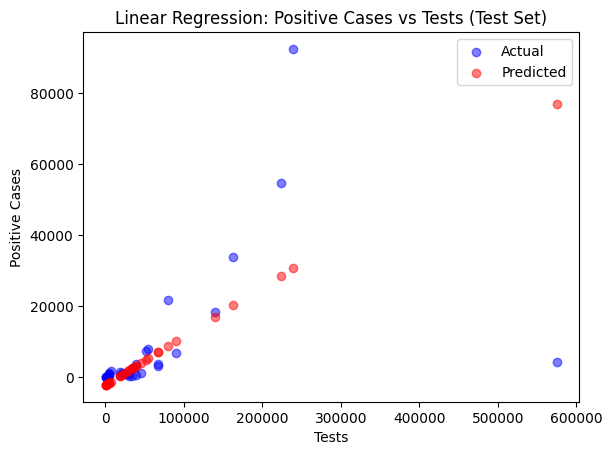

In [19]:
# Plot actual vs predicted values
plt.scatter(X_test['tests'], y_test, label="Actual", color="blue", alpha=0.5) # Use only 'tests' column from X_test
plt.scatter(X_test['tests'], y_test_pred, label="Predicted", color="red", alpha=0.5) # Use only 'tests' column from X_test
plt.xlabel("Tests")
plt.ylabel("Positive Cases")
plt.title("Linear Regression: Positive Cases vs Tests (Test Set)")
plt.legend()
plt.show()

In [20]:
# Display the test dataset with predictions
X_test_display = X_test.copy()
X_test_display['Actual Positive'] = y_test
X_test_display['Predicted Positive'] = y_test_pred

print("\nTest Dataset with Predictions:\n")
print(X_test_display)


Test Dataset with Predictions:

     const     tests  Actual Positive  Predicted Positive
79     1.0   52086.0           7443.0         4930.654880
10     1.0     591.0             97.0        -2143.807614
4      1.0   30000.0            443.0         1896.446148
85     1.0   24857.0            911.0         1189.892879
64     1.0   18432.0            696.0          307.216473
69     1.0    1185.0              6.0        -2062.202979
31     1.0   67281.0           3858.0         7018.167407
46     1.0   80000.0          21638.0         8765.523237
97     1.0  163194.0          33718.0        20194.843224
11     1.0    4051.0            529.0        -1668.467480
83     1.0   39000.0            558.0         3132.880024
81     1.0  575000.0           4149.0        76769.386421
0      1.0    4843.0            966.0        -1559.661299
82     1.0    5008.0           1171.0        -1536.993344
18     1.0    2333.0            135.0        -1904.488969
71     1.0   29485.0            772.0  